In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylira import Dataset

# Basic test

In [3]:
np.random.seed(123)
n = 50
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.0

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs, y_obs, x_err, y_err, corr=corr)

In [4]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
R[write to console]: Loading required package: coda

R[write to console]: Loading required package: rjags

R[write to console]: Linked to JAGS 4.3.1

R[write to console]: Loaded modules: basemod,bugs



BCES: beta=0.988, alpha=1.01, s=0.353
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)
[1] "No threshold detected"


R[write to console]: module mix loaded



  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.00943 0.03928 0.0003928      0.0006488
beta.YIZ    0.98698 0.03334 0.0003334      0.0005268
mu.Z.0      0.01231 0.17327 0.0017327      0.0021993
sigma.YIZ.0 0.23757 0.03388 0.0003388      0.0007072
sigma.Z.0   1.21527 0.12711 0.0012711      0.0013198

2. Quantiles for each variable:

               2.5%     25%     50%    75%  97.5%
alpha.YIZ    0.9320  0.9833 1.01017 1.0356 1.0845
beta.YIZ     0.9212  0.9645 0.98681 1.0098 1.0524
mu.Z.0      -0.3294 -0.1045 0.01109 0.1300 0.3548
sigma.YIZ.0  0.1767  0.2139 0.23535 0.2592 0.3101
sigma.Z.0    1.0007  1.1255 1.20425 1.2915 1.4949



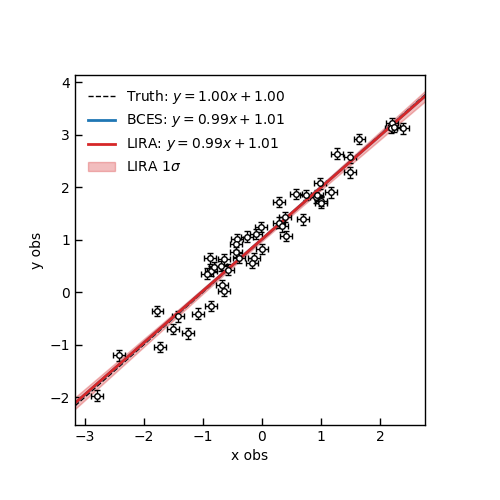

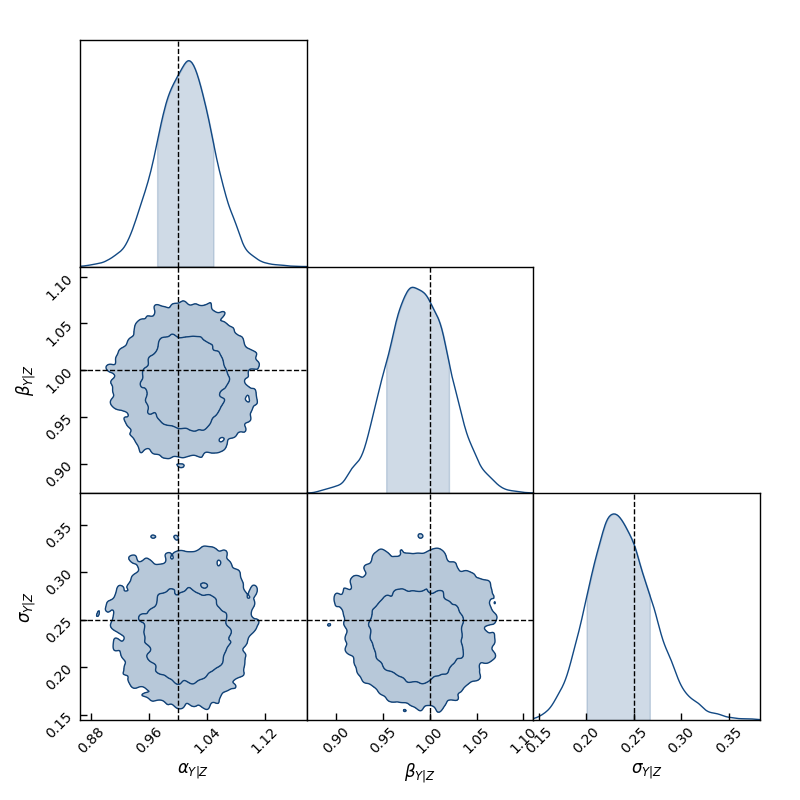

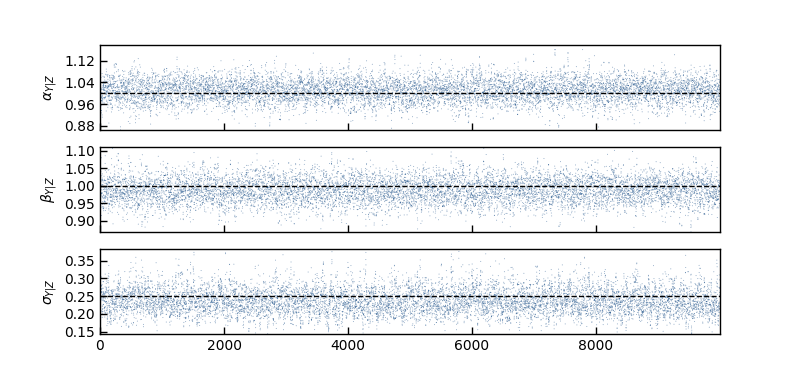

In [5]:
fig, ax = ds.plot_data(style="errb")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])

# Correlated uncertainties

In [6]:
np.random.seed(123)
n = 50
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.5

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs, y_obs, x_err, y_err, corr=corr)

In [7]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

BCES: beta=0.984, alpha=1.01, s=0.366
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)
[1] "No threshold detected"
  |************                                      |  24%

/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.01083 0.03975 0.0003975      0.0005359
beta.YIZ    0.98368 0.03272 0.0003272      0.0004414
mu.Z.0      0.01485 0.17380 0.0017380      0.0022560
sigma.YIZ.0 0.25896 0.03181 0.0003181      0.0005236
sigma.Z.0   1.21639 0.12859 0.0012859      0.0013897

2. Quantiles for each variable:

               2.5%     25%     50%    75%  97.5%
alpha.YIZ    0.9316  0.9850 1.01051 1.0369 1.0915
beta.YIZ     0.9193  0.9619 0.98348 1.0058 1.0473
mu.Z.0      -0.3275 -0.1022 0.01466 0.1312 0.3583
sigma.YIZ.0  0.2056  0.2364 0.25624 0.2784 0.3276
sigma.Z.0    0.9946  1.1259 1.20602 1.2944 1.5004



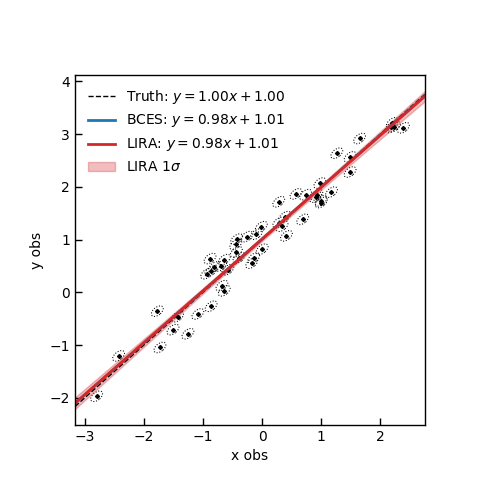

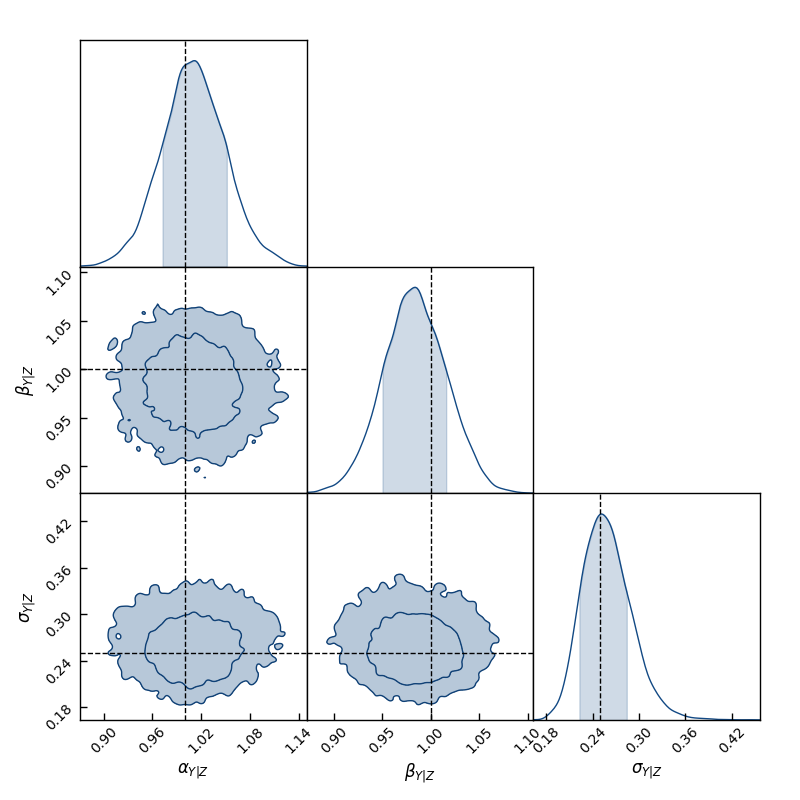

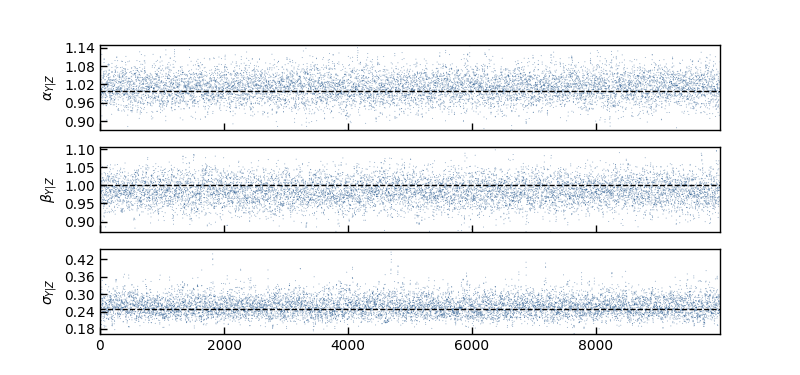

In [8]:
fig, ax = ds.plot_data(style="ellipse")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])

# Truncated distribution

In [9]:
np.random.seed(123)
n = 100
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)
msk = y > 1.0

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.5

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs[msk], y_obs[msk], x_err[msk], y_err[msk], corr=corr[msk], y_threshold=1.0)

In [10]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

BCES: beta=0.925, alpha=1.1, s=0.321
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)
[1] "Threshold detected"


/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.0177 0.09341 0.0009341      0.0038860
beta.YIZ    0.9799 0.07344 0.0007344      0.0030051
mu.Z.0      1.0265 0.09399 0.0009399      0.0012247
sigma.YIZ.0 0.2448 0.03383 0.0003383      0.0006390
sigma.Z.0   0.6321 0.06880 0.0006880      0.0007371

2. Quantiles for each variable:

              2.5%    25%    50%    75%  97.5%
alpha.YIZ   0.8168 0.9591 1.0221 1.0813 1.1884
beta.YIZ    0.8438 0.9301 0.9765 1.0264 1.1346
mu.Z.0      0.8398 0.9652 1.0267 1.0890 1.2122
sigma.YIZ.0 0.1870 0.2210 0.2416 0.2654 0.3194
sigma.Z.0   0.5139 0.5834 0.6260 0.6744 0.7846



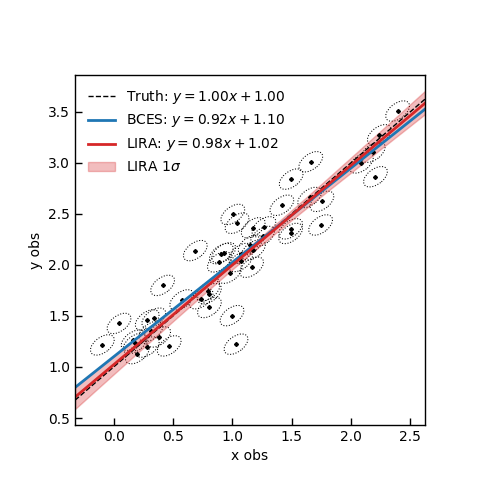

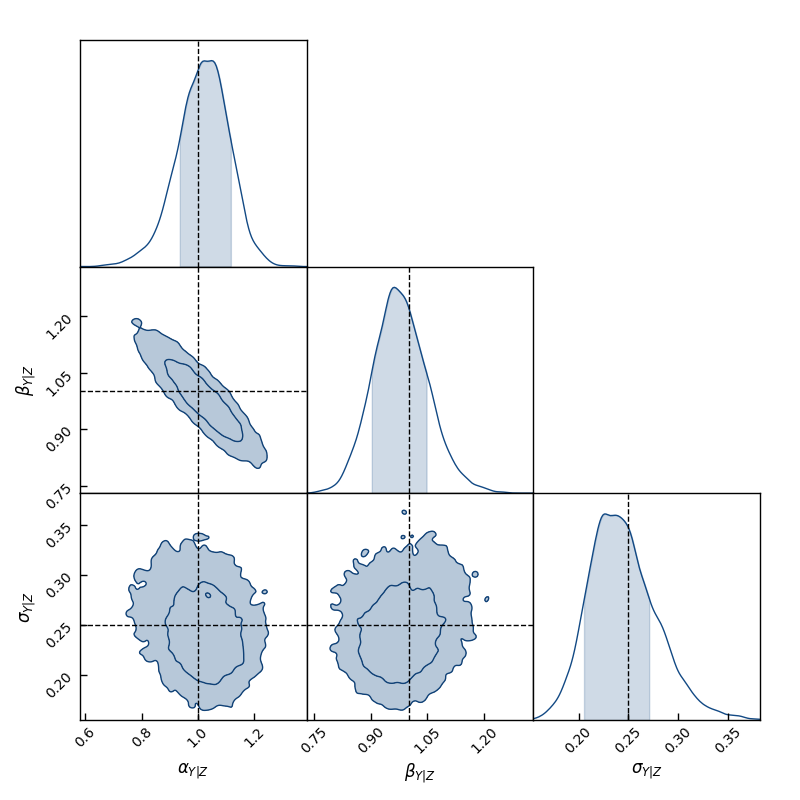

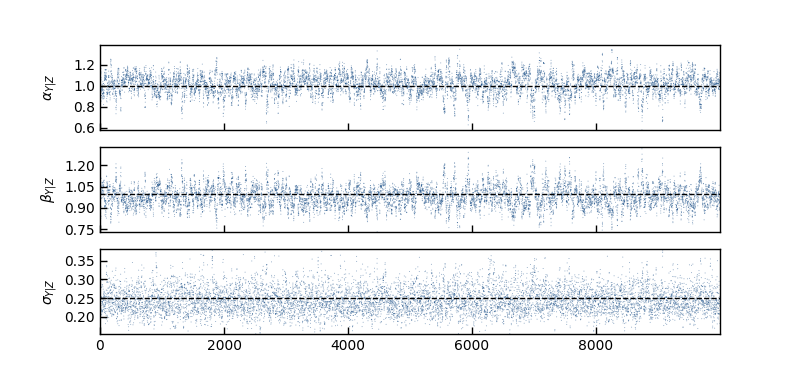

In [11]:
fig, ax = ds.plot_data(style="ellipse")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])